<a href="https://colab.research.google.com/github/ClaudeJang/Duran-Duran-Returns/blob/master/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 처음 실행할 때 한 번만! 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth

auth.authenticate_user()

from oauth2client.client import GoogleCredentials

creds = GoogleCredentials.get_application_default()

import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

vcode = getpass.getpass()

!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive

!google-drive-ocamlfuse drive

In [0]:
cd drive

/content/drive


In [0]:
# ls -ltr

total 0


In [0]:
import keras
import pandas as pd 
import numpy as np 
import warnings


In [0]:
train = pd.read_csv('./Colab Notebooks/data/normed_perfect_train.csv', encoding='utf-8',index_col = 0)

train.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,key,city,apartment_id,address_by_law,transaction_date,transaction_year_month,year_of_completion,apartment_building_count_in_sites,bathroom_count,exclusive_use_area,...,district,individual,cogeneration,gas,corridor,mixed,stairway,Busan,Seoul,transaction_real_price
0,0.000000e+00,1.0,0.111040,0.000004,0.47619,0.0,0.660714,0.00000,0.2,0.111218,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,215000000
1,6.229082e-07,1.0,0.111040,0.000004,0.47619,0.0,0.660714,0.00000,0.2,0.100252,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,200000000
2,1.245816e-06,1.0,0.100595,0.000004,0.47619,0.0,0.535714,0.03252,0.2,0.137272,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,168000000
3,1.868725e-06,1.0,0.055968,0.000004,0.47619,0.0,0.553571,0.04878,0.2,0.172966,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,165000000
4,2.491633e-06,1.0,0.055968,0.000004,0.47619,0.0,0.553571,0.04878,0.4,0.323339,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,280000000


In [0]:
test = pd.read_csv('./Colab Notebooks/data/normed_perfect_test.csv',encoding='utf-8',index_col =0)
test.tail()

,key,city,apartment_id,address_by_law,transaction_date,transaction_year_month,year_of_completion,apartment_building_count_in_sites,bathroom_count,exclusive_use_area,...,district,individual,cogeneration,gas,corridor,mixed,stairway,Busan,Seoul,transaction_real_price
1605365,0.998999,1.0,0.660452,0.019259,0.47619,1.000000,0.964286,0.008130,0.50,0.277970,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1605366,0.999313,1.0,0.659955,0.001754,0.00000,1.000000,0.964286,0.008130,0.25,0.063231,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1605367,0.999327,0.0,0.660194,0.889407,0.00000,1.000000,0.946429,0.162602,0.50,0.467836,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1605368,0.999955,1.0,0.737669,0.010506,1.00000,1.000000,0.982143,0.032520,0.50,0.178478,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1605375,0.992744,0.0,0.739579,0.896410,0.47619,0.998886,0.982143,0.000000,0.50,0.137560,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0


In [0]:
train.columns

Index(['key', 'city', 'apartment_id', 'address_by_law', 'transaction_date',
       'transaction_year_month', 'year_of_completion',
       'apartment_building_count_in_sites', 'bathroom_count',
       'exclusive_use_area', 'floor', 'latitude', 'longitude', 'room_count',
       'room_id', 'supply_area', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'total_household_count_in_sites',
       'total_household_count_of_area_type', 'total_parking_capacity_in_site',
       'mortgage_loan', 'central', 'district', 'individual', 'cogeneration',
       'gas', 'corridor', 'mixed', 'stairway', 'Busan', 'Seoul',
       'transaction_real_price'],
      dtype='object')

In [0]:
train_data = train[['year_of_completion',
       'supply_area', 'floor',
       'mortgage_loan','central','district',
       'Busan', 'Seoul']]
train_targets = train[['transaction_real_price']]

In [0]:
# train_data
np.isnan(train_data).sum()
# train_targets.head()

year_of_completion    0
supply_area           0
floor                 0
mortgage_loan         0
central               0
district              0
Busan                 0
Seoul                 0
dtype: int64

In [0]:
test.columns

Index(['key', 'city', 'apartment_id', 'address_by_law', 'transaction_date',
       'transaction_year_month', 'year_of_completion',
       'apartment_building_count_in_sites', 'bathroom_count',
       'exclusive_use_area', 'floor', 'latitude', 'longitude', 'room_count',
       'room_id', 'supply_area', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'total_household_count_in_sites',
       'total_household_count_of_area_type', 'total_parking_capacity_in_site',
       'mortgage_loan', 'central', 'district', 'individual', 'cogeneration',
       'gas', 'corridor', 'mixed', 'stairway', 'Busan', 'Seoul',
       'transaction_real_price'],
      dtype='object')

In [0]:
test_data = test[['year_of_completion',
       'supply_area', 'floor',
       'mortgage_loan','central','district',
       'Busan', 'Seoul']]

# test_data = test[['year_of_completion',
#        'apartment_building_count_in_sites', 'bathroom_count',
#        'exclusive_use_area', 'floor', 'room_count',
#        'tallest_building_in_sites', 'total_household_count_in_sites',
#        'mortgage_loan', 'parking_per_household','central', 'district',
#        'individual', 'cogeneration', 'gas', 'corridor', 'mixed', 'stairway',
#        'busan', 'seoul']]
test_targets = test[['transaction_real_price']]

In [0]:
test_data.shape
# test_targets.head()

(3918, 8)

In [0]:
train_data = train_data.as_matrix()
train_targets = train_targets.as_matrix()
# train_targets=train_targets.flatten()
test_data = test_data.as_matrix()
test_targets = test_targets.as_matrix()
# test_targets = test_targets.flatten()

AttributeError: ignored

In [0]:
train_data.shape[1]
# test_targets.shape
# type(y_train)

# test_targets


8

In [0]:
#     model.add(LeakyReLU(alpha=0.05))
#     model.add(BatchNormalization())
# #     model.add(Dropout(0.25))
#     model.add(layers.Dense(128,kernel_initializer='normal')) # 0.001
#     model.add(LeakyReLU(alpha=0.05))
#     model.add(BatchNormalization())
# #     model.add(Dropout(0.25))
#     model.add(layers.Dense(128,kernel_initializer='normal')) # 0.001
#     model.add(LeakyReLU(alpha=0.05))
#     model.add(BatchNormalization())
# #     model.add(Dropout(0.25))
#     model.add(layers.Dense(128,kernel_initializer='normal')) # 0.001
#     model.add(LeakyReLU(alpha=0.05))
#     model.add(BatchNormalization())
# #     model.add(Dropout(0.25))
#     model.add(layers.Dense(128,kernel_initializer='normal')) # 0.001
#     model.add(LeakyReLU(alpha=0.05))
#     model.add(BatchNormalization())
# #     model.add(Dropout(0.25))
#     model.add(layers.Dense(1))
# #     opt = keras.optimizers.rmsprop(lr=0.00045,decay=1e-5) # 0.015 0.01 
# #     opt = keras.optimizers.Adam(lr=0.000005)
# #     opt = SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=100)

In [0]:
from sklearn.model_selection import train_test_split 


x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_targets, test_size = 0.3, random_state = 1,shuffle = True )

In [0]:
x_train.shape
# x_train

NameError: ignored

In [0]:
from keras import models
from keras import layers 
from keras import backend as K
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras import regularizers
from keras.layers import LeakyReLU
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from keras.callbacks import EarlyStopping # epoch마다 모델을 학습시킨 후에 호출하는 콜백함수.조기종료 기능 
import sys

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true),axis=-1))

In [0]:
early_stopping = EarlyStopping(patience = 10) # 조기종료 콜백함수 정의


def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    act = keras.layers.advanced_activations.PReLU(alpha_initializer="zero", weights=None)
    model.add(layers.Dense(20,
                           input_shape=(train_data.shape[1],),kernel_initializer='normal')) # 0.001
    model.add(act)
    model.add(layers.Dense(20,kernel_initializer='normal'))
    model.add(act)
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',loss=root_mean_squared_error, metrics=['mae'])
    return model
  
# num_epochs = 100
model = build_model()


# hist = model.fit(x_train,y_train,
#           epochs=80, batch_size=5000, validation_data=(x_valid,y_valid),verbose=1,callbacks=[early_stopping])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  import sys


In [0]:
import numpy as np
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping() # 조기종료 콜백함수 정의

k = 4
num_val_samples = len(train_data) // k
num_epochs = 7
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history=model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data,val_targets),
              epochs=num_epochs, batch_size=500, verbose=1)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    # 검증 세트로 모델 평가
#     val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#     all_scores.append(val_mae)

처리중인 폴드 # 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  import sys


Train on 1201094 samples, validate on 400364 samples
Epoch 1/7
1201094/1201094 [==============================] - 25s 21us/step - loss: 436304575.7194 - mean_absolute_error: 436304575.7194 - val_loss: 297579122.5524 - val_mean_absolute_error: 297579122.5524
Epoch 2/7
1201094/1201094 [==============================] - 18s 15us/step - loss: 429263482.1562 - mean_absolute_error: 429263482.1562 - val_loss: 278994165.9899 - val_mean_absolute_error: 278994165.9899
Epoch 3/7
1201094/1201094 [==============================] - 18s 15us/step - loss: 392857695.9945 - mean_absolute_error: 392857695.9945 - val_loss: 213873770.6605 - val_mean_absolute_error: 213873770.6605
Epoch 4/7
1201094/1201094 [==============================] - 18s 15us/step - loss: 302036380.4516 - mean_absolute_error: 302036380.4516 - val_loss: 161465215.0402 - val_mean_absolute_error: 161465215.0402
Epoch 5/7
1201094/1201094 [==============================] - 18s 15us/step - loss: 214724230.9666 - mean_absolute_error: 214724

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

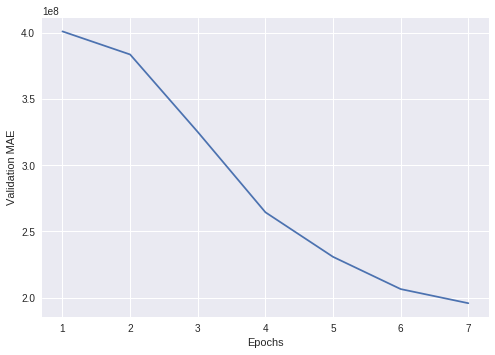

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=6, batch_size=100, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  import sys


Epoch 1/6
1601458/1601458 [==============================] - 105s 66us/step - loss: 291477019.0452 - mean_absolute_error: 291477019.0452
Epoch 2/6
1601458/1601458 [==============================] - 98s 61us/step - loss: 170066203.3712 - mean_absolute_error: 170066203.3712
Epoch 3/6
1601458/1601458 [==============================] - 98s 61us/step - loss: 152252938.9688 - mean_absolute_error: 152252938.9688
Epoch 4/6
1601458/1601458 [==============================] - 98s 61us/step - loss: 140255421.5456 - mean_absolute_error: 140255421.5456
Epoch 5/6
1601458/1601458 [==============================] - 98s 61us/step - loss: 131171035.5112 - mean_absolute_error: 131171035.5112
Epoch 6/6
3918/3918 [==============================] - 3s 883us/step


In [0]:
test_mse_score

490001794.9729454

In [0]:
all_scores
np.mean(all_scores)

nan

In [0]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [0]:
# 검증세트로 모델 평가 
test_rmse_score, test_mae_score = model.evaluate(x_valid, y_valid, verbose = 1)

480438/480438 [==============================] - 57s 118us/step


In [0]:
prediction = model.predict(test_data, batch_size = 1, verbose = 1, steps = None)

3918/3918 [==============================] - 14s 4ms/step


In [0]:
submission_file=pd.DataFrame(prediction, columns = ["transaction_real_price"])

# len(prediction)

In [0]:
submission_file
submission_file.to_csv('./Colab Notebooks/DACON_submission/submission2.csv', encoding = 'utf-8')

In [0]:
submission = pd.read_csv('./Colab Notebooks/data/submission.csv')

In [0]:
submission

,key,transaction_real_price
0,462533,0
1,764018,0
2,813528,0
3,845097,0
4,856338,0
5,977181,0
6,1037012,0
7,1158117,0
8,1204038,0
9,1204146,0


In [0]:
submission['transaction_real_price'] = submission_file['transaction_real_price']

In [0]:
submission.set_index('key',inplace = True)

In [0]:
submission

,transaction_real_price
key,
462533,208501312.0
764018,318036992.0
813528,449501824.0
845097,275408736.0
856338,381425696.0
977181,331613984.0
1037012,391199200.0
1158117,383378048.0
1204038,498104416.0


In [0]:
submission.to_csv('./Colab Notebooks/DACON_submission/submission.csv', encoding = 'utf-8')